In [5]:
import pandas as pd
import numpy as np
import scipy.sparse as sps

from scipy.sparse import *

TopPop for comptetion data


In [31]:
urm_path = '/content/data_train.csv'

urm_all_df = pd.read_csv(filepath_or_buffer=urm_path,
                                sep=",",
                                header=0,
                                dtype={0:int, 1:int, 2:float},
                                engine='python')

urm_all_df.columns = ["UserID", "ItemID", "Interaction"]

In [7]:
urm_all_df.head(10)

,UserID,ItemID,Interaction
0,1,7,1.0
1,1,15,1.0
2,1,16,1.0
3,1,133,1.0
4,1,161,1.0
5,1,187,1.0
6,1,205,1.0
7,1,222,1.0
8,1,237,1.0
9,1,354,1.0


In [8]:
print ("The number of interactions is {}".format(len(urm_all_df)))

The number of interactions is 478730


In [9]:
userID_unique = urm_all_df["UserID"].unique()
itemID_unique = urm_all_df["ItemID"].unique()

n_users = len(userID_unique)
n_items = len(itemID_unique)
n_interactions = len(urm_all_df)

print ("Number of items\t {}, Number of users\t {}".format(n_items, n_users))
print ("Max ID items\t {}, Max Id users\t {}\n".format(max(itemID_unique), max(userID_unique)))

Number of items	 22222, Number of users	 12638
Max ID items	 22347, Max Id users	 13024



In [10]:
# Remove empty IDs
mapped_id, original_id = pd.factorize(urm_all_df["UserID"].unique())
user_original_ID_to_index = pd.Series(mapped_id, index=original_id)

mapped_id, original_id = pd.factorize(urm_all_df["ItemID"].unique())
item_original_ID_to_index = pd.Series(mapped_id, index=original_id)

original_item_ID = 125
print("New index for item {} is {}".format(original_item_ID, item_original_ID_to_index[original_item_ID]))


urm_all_df["UserID"] = urm_all_df["UserID"].map(user_original_ID_to_index)
urm_all_df["ItemID"] = urm_all_df["ItemID"].map(item_original_ID_to_index)
urm_all_df.head(n=10)

New index for item 125 is 93


,UserID,ItemID,Interaction
0,0,0,1.0
1,0,1,1.0
2,0,2,1.0
3,0,3,1.0
4,0,4,1.0
5,0,5,1.0
6,0,6,1.0
7,0,7,1.0
8,0,8,1.0
9,0,9,1.0


In [11]:
userID_unique = urm_all_df["UserID"].unique()
itemID_unique = urm_all_df["ItemID"].unique()

n_users = len(userID_unique)
n_items = len(itemID_unique)
n_interactions = len(urm_all_df)

print ("Number of items\t {}, Number of users\t {}".format(n_items, n_users))
print ("Max ID items\t {}, Max Id users\t {}\n".format(max(itemID_unique), max(userID_unique)))
print ("Average interactions per user {:.2f}".format(n_interactions/n_users))
print ("Average interactions per item {:.2f}\n".format(n_interactions/n_items))

print ("Sparsity {:.2f} %".format((1-float(n_interactions)/(n_items*n_users))*100))

Number of items	 22222, Number of users	 12638
Max ID items	 22221, Max Id users	 12637

Average interactions per user 37.88
Average interactions per item 21.54

Sparsity 99.83 %


In [13]:
urm_all = sps.coo_matrix((urm_all_df["Interaction"].values,
                          (urm_all_df["UserID"].values, urm_all_df["ItemID"].values)))

urm_all

<12638x22222 sparse matrix of type '<class 'numpy.float64'>'
	with 478730 stored elements in COOrdinate format>

In [14]:
urm_all.tocsr()

<12638x22222 sparse matrix of type '<class 'numpy.float64'>'
	with 478730 stored elements in Compressed Sparse Row format>

**The distribution of item popularities**


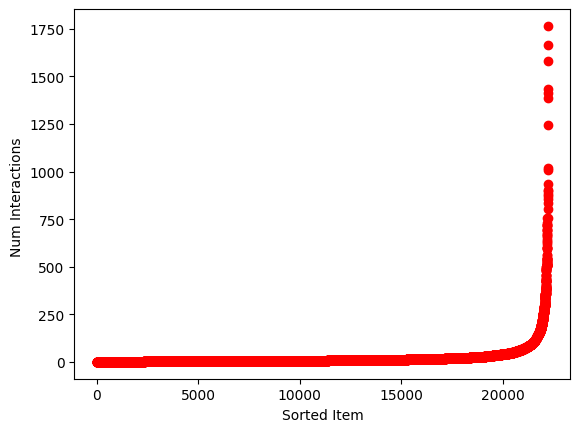

In [15]:
from matplotlib import pyplot

item_popularity = np.ediff1d(urm_all.tocsc().indptr)

item_popularity = np.sort(item_popularity)

pyplot.plot(item_popularity, 'ro')
pyplot.ylabel('Num Interactions ')
pyplot.xlabel('Sorted Item')
pyplot.show()

In [16]:
ten_percent = int(n_items/10)

print("Average per-item interactions over the whole dataset {:.2f}".
      format(item_popularity.mean()))

print("Average per-item interactions for the top 10% popular items {:.2f}".
      format(item_popularity[-ten_percent:].mean()))

print("Average per-item interactions for the least 10% popular items {:.2f}".
      format(item_popularity[:ten_percent].mean()))

print("Average per-item interactions for the median 10% popular items {:.2f}".
      format(item_popularity[int(n_items*0.45):int(n_items*0.55)].mean()))

print("Number of items with zero interactions {}".
      format(np.sum(item_popularity==0)))

Average per-item interactions over the whole dataset 21.54
Average per-item interactions for the top 10% popular items 122.73
Average per-item interactions for the least 10% popular items 2.35
Average per-item interactions for the median 10% popular items 8.37
Number of items with zero interactions 0


**The distribution of user activity**

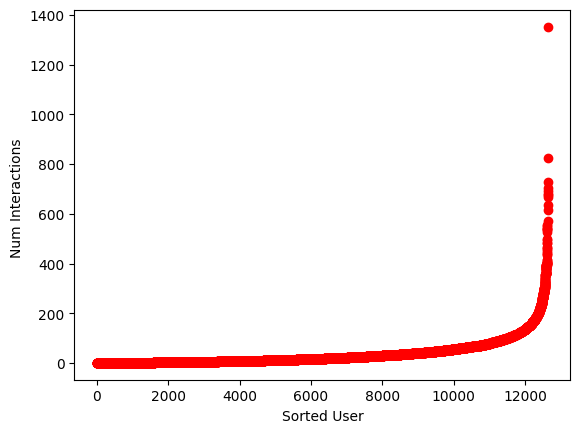

In [17]:
user_activity = np.ediff1d(urm_all.tocsr().indptr)
user_activity = np.sort(user_activity)


pyplot.plot(user_activity, 'ro')
pyplot.ylabel('Num Interactions ')
pyplot.xlabel('Sorted User')
pyplot.show()

In [18]:
ten_percent = int(n_items/10)

print("Average per-item interactions over the whole dataset {:.2f}".
      format(user_activity.mean()))

print("Average per-item interactions for the top 10% popular items {:.2f}".
      format(user_activity[-ten_percent:].mean()))

print("Average per-item interactions for the least 10% popular items {:.2f}".
      format(user_activity[:ten_percent].mean()))

print("Average per-item interactions for the median 10% popular items {:.2f}".
      format(user_activity[int(n_items*0.45):int(n_items*0.55)].mean()))

print("Number of items with zero interactions {}".
      format(np.sum(user_activity==0)))

Average per-item interactions over the whole dataset 37.88
Average per-item interactions for the top 10% popular items 129.63
Average per-item interactions for the least 10% popular items 1.88
Average per-item interactions for the median 10% popular items 91.34
Number of items with zero interactions 0


**Let's split the data into train and test**

In [19]:
train_test_split = 0.80

n_interactions = urm_all.nnz

train_mask = np.random.choice([True,False], n_interactions, p=[train_test_split, 1-train_test_split])
train_mask

urm_train = sps.csr_matrix((urm_all.data[train_mask],
                            (urm_all.row[train_mask], urm_all.col[train_mask])))


test_mask = np.logical_not(train_mask)

urm_test = sps.csr_matrix((urm_all.data[test_mask],
                            (urm_all.row[test_mask], urm_all.col[test_mask])))


In [20]:
def precision(recommended_items, relevant_items):

    is_relevant = np.in1d(recommended_items, relevant_items, assume_unique=True)

    precision_score = np.sum(is_relevant, dtype=np.float32) / len(is_relevant)

    return precision_score

def recall(recommended_items, relevant_items):

    is_relevant = np.in1d(recommended_items, relevant_items, assume_unique=True)

    recall_score = np.sum(is_relevant, dtype=np.float32) / relevant_items.shape[0]

    return recall_score

def AP(recommended_items, relevant_items):

    is_relevant = np.in1d(recommended_items, relevant_items, assume_unique=True)

    # Cumulative sum: precision at 1, at 2, at 3 ...
    p_at_k = is_relevant * np.cumsum(is_relevant, dtype=np.float32) / (1 + np.arange(is_relevant.shape[0]))

    ap_score = np.sum(p_at_k) / np.min([relevant_items.shape[0], is_relevant.shape[0]])

    return ap_score

In [21]:
def evaluate_algorithm(URM_test, recommender_object, at=5):

    cumulative_precision = 0.0
    cumulative_recall = 0.0
    cumulative_AP = 0.0

    num_eval = 0


    for user_id in range(URM_test.shape[0]):

        relevant_items = URM_test.indices[URM_test.indptr[user_id]:URM_test.indptr[user_id+1]]

        if len(relevant_items)>0:

            recommended_items = recommender_object.recommend(user_id, at=at)
            num_eval+=1

            cumulative_precision += precision(recommended_items, relevant_items)
            cumulative_recall += recall(recommended_items, relevant_items)
            cumulative_AP += AP(recommended_items, relevant_items)

    cumulative_precision /= num_eval
    cumulative_recall /= num_eval
    MAP = cumulative_AP / num_eval

    print("Recommender results are: Precision = {:.4f}, Recall = {:.4f}, MAP = {:.4f}".format(
        cumulative_precision, cumulative_recall, MAP))

In [22]:
class TopPopRecommender(object):

    def fit(self, URM_train):

        self.URM_train = URM_train

        item_popularity = np.ediff1d(URM_train.tocsc().indptr)

        # We are not interested in sorting the popularity value,
        # but to order the items according to it
        self.popular_items = np.argsort(item_popularity)
        self.popular_items = np.flip(self.popular_items, axis = 0)


    def recommend(self, user_id, at=5, remove_seen=True):

        if remove_seen:
            seen_items = self.URM_train.indices[self.URM_train.indptr[user_id]:self.URM_train.indptr[user_id+1]]

            unseen_items_mask = np.in1d(self.popular_items, seen_items, assume_unique=True, invert = True)

            unseen_items = self.popular_items[unseen_items_mask]

            recommended_items = unseen_items[0:at]

        else:
            recommended_items = self.popular_items[0:at]


        return recommended_items

In [23]:
topPopRecommender_removeSeen = TopPopRecommender()
topPopRecommender_removeSeen.fit(urm_train)

for userid in range(10):
    print(topPopRecommender_removeSeen.recommend(userid, at=5,remove_seen=True))

[517 189  44 284 808]
[517 189   0 284 808]
[517 189  44   0 284]
[517 189  44   0 284]
[517 189   0 284 808]
[517   0 284 808 285]
[517 189  44   0 284]
[517 189   0 284 808]
[517 189  44   0 284]
[517 189  44   0 284]


In [24]:
evaluate_algorithm(urm_test, topPopRecommender_removeSeen)

Recommender results are: Precision = 0.0366, Recall = 0.0292, MAP = 0.0255


**Now let's read the data we want to predict for and see if there're overlaps with UserIDs in train data**

In [67]:
urm_path = '/content/data_train.csv'

urm_all_orgdf = pd.read_csv(filepath_or_buffer=urm_path,
                                sep=",",
                                header=0,
                                dtype={0:int, 1:int, 2:float},
                                engine='python')

urm_all_orgdf.columns = ["UserID", "ItemID", "Interaction"]
len(urm_all_orgdf['UserID'])

478730

In [75]:
urm_path = '/content/data_target_users_test.csv'

urm_pred_df = pd.read_csv(filepath_or_buffer=urm_path,
                                sep=",",
                                header=0,
                                dtype={0:int},
                                engine='python')

urm_pred_df.columns = ["UserID"]
len(urm_pred_df['UserID'])

10882

In [80]:
# With this we can see how many UserIDs to be predicted for are present in the train data
sum(np.logical_not(np.in1d(np.array(urm_pred_df['UserID']),np.array(urm_all_orgdf['UserID']), assume_unique=True)))

221

In [82]:
class TopPopRec2pred(object):

    def fit(self, URM_train):

        self.URM_train = URM_train

        item_popularity = np.ediff1d(URM_train.tocsc().indptr)

        # We are not interested in sorting the popularity value,
        # but to order the items according to it
        self.popular_items = np.argsort(item_popularity)
        self.popular_items = np.flip(self.popular_items, axis = 0)


    def recommend(self, user_id, at=5, remove_seen=True):

        if remove_seen:
            seen_items = self.URM_train.indices[self.URM_train.indptr[user_id]:self.URM_train.indptr[user_id+1]]

            unseen_items_mask = np.in1d(self.popular_items, seen_items, assume_unique=True, invert = True)

            unseen_items = self.popular_items[unseen_items_mask]

            recommended_items = unseen_items[0:at]

        else:
            recommended_items = self.popular_items[0:at]


        return recommended_items

    def recommend_for_pred(self, user_id, at=5, remove_seen=True):

        if remove_seen and (user_id in user_original_ID_to_index.keys()):

            seen_items = self.URM_train.indices[self.URM_train.indptr[user_original_ID_to_index[user_id]]:self.URM_train.indptr[user_original_ID_to_index[user_id]+1]]

            unseen_items_mask = np.in1d(self.popular_items, seen_items, assume_unique=True, invert = True)

            unseen_items = self.popular_items[unseen_items_mask]

            recommended_items = unseen_items[0:at]

        else:
            recommended_items = self.popular_items[0:at]


        return recommended_items

In [83]:
topPopRecommender_removeSeen = TopPopRec2pred()
topPopRecommender_removeSeen.fit(urm_train)

In [107]:
pred_df = pd.DataFrame(columns = ['user_id','item_list'])

for userid in urm_pred_df['UserID']:
  recomendatoins = topPopRecommender_removeSeen.recommend_for_pred(userid, at=10,remove_seen=True)
  recomendatoins = " ".join(str(item) for item in recomendatoins)
  pred_df.loc[len(pred_df)] = [userid,recomendatoins]

In [108]:
pred_df

,user_id,item_list
0,1,517 189 44 284 808 285 557 1266 45 1265
1,2,517 189 0 284 808 285 1 557 1266 1265
2,3,517 189 44 0 284 808 285 1 557 1266
3,4,517 189 44 0 284 808 285 1 557 1266
4,5,517 189 0 284 808 285 1 557 1266 45
...,...,...
10877,13020,517 189 44 0 284 808 285 557 1266 45
10878,13021,517 44 0 284 808 285 1 557 1266 45
10879,13022,517 189 44 0 284 808 285 1 557 1266
10880,13023,517 189 44 0 284 808 285 1 557 1266


In [109]:
pred_df.to_csv('/content/prediciotns.csv',index=False)